## Project Title : Stock Price Prediction using Machine Learning
**Objective** : 
>To build a linear regression model that predicts future stock prices for Google (GOOGL) based on historical data.Evaluate the model’s performance using appropriate metrics and visualize predictions against actual stock prices.

#### Setting Up EDA Environment :
> setting up the environment for data analysis using pandas, numpy, matplotlib and Seaborn.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')

#### Data Collection  :
 > Collecting Stock price data From Google 

In [3]:
df1=pd.read_csv('GOOG.csv')
df1.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


**Data Overview:**
* The dataset contains information for the stock symbol “GOOG” (Google/Alphabet).
* It covers dates from June 14, 2016, to June 20, 2016.
* Columns include: symbol, date, close, high, low, open, volume, adjClose, adjHigh, adjLow, adjOpen, adjVolume, divCash, and splitFactor.

**Column Descriptions:**
* close: Closing price of the stock on a given date.
* high: Highest price during the trading day.
* low: Lowest price during the trading day.
* open: Opening price at the beginning of the trading day.
* volume: Trading volume (number of shares traded) on that date.
* adjClose, adjHigh, adjLow, adjOpen, adjVolume: Adjusted values (accounting for stock splits and dividends).
* divCash: Dividends (if any) in cash.
* splitFactor: Stock split factor (usually 1.0 unless there was a split).

#### Initial Checkup :
> Let’s perform an initial checkup on your Google stock price dataset using Pandas. We’ll cover missing values, duplicates, summary statistics, overall information, and the dataset size.

In [4]:
# Count of missing values per column
df1.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [5]:
# Count of duplicates for each column
df1.duplicated(keep=False).sum()

0

In [6]:
# Summary Statistics
df1.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [7]:
# Overall Information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [8]:
# Dataset Size
df1.shape

(1258, 14)

We can drop the other columns (high, low, adjClose, adjHigh, adjLow, adjOpen, adjVolume, divCash, splitFactor) as they are not directly related to predicting stock prices using linear regression.

In [11]:
relevant_columns = ['date', 'close', 'open', 'volume']
df_relevant = df1[relevant_columns]
df_relevant.head(10)

,date,close,open,volume
0,2016-06-14 00:00:00+00:00,718.27,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,698.77,2082538
5,2016-06-21 00:00:00+00:00,695.94,698.40,1465634
6,2016-06-22 00:00:00+00:00,697.46,699.06,1184318
7,2016-06-23 00:00:00+00:00,701.87,697.45,2171415
8,2016-06-24 00:00:00+00:00,675.22,675.17,4449022
9,2016-06-27 00:00:00+00:00,668.26,671.00,2641085


#### Data Visualization :

**Line Plot of Closing Prices:**
>Visualize the closing prices over time.
This provides a fundamental overview of the stock’s performance.

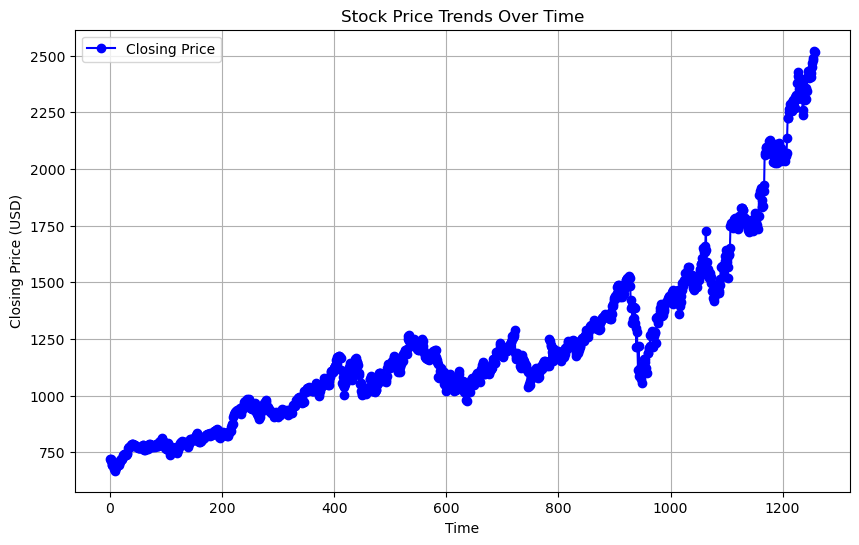

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_relevant['close'], label='Closing Price', color='b', linestyle='-', marker='o')
plt.xlabel('Time')
plt.ylabel('Closing Price (USD)')
plt.title('Stock Price Trends Over Time')
plt.legend()
plt.grid()
plt.show()

**Distribution of Daily Returns:**
Exploring the volatility of the stock by analyzing daily returns.

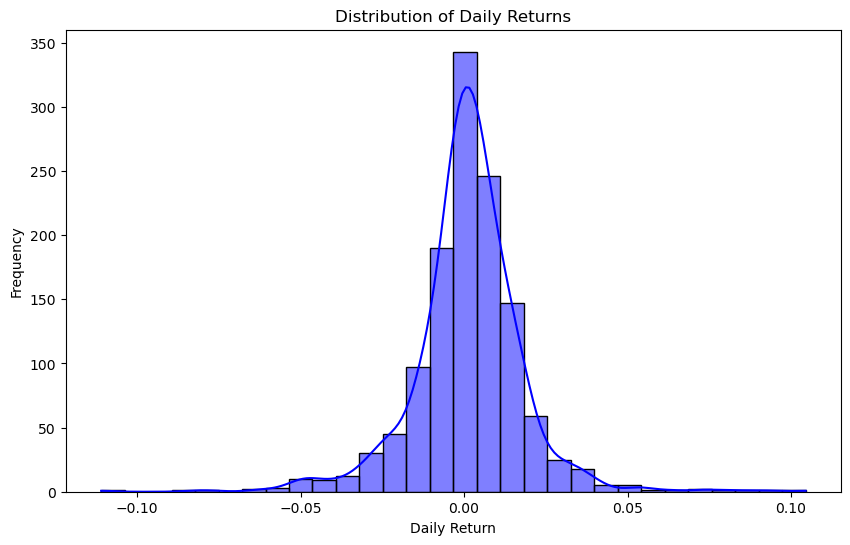

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df1['adjClose'].pct_change().dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

**Candlestick Chart:**
Displaying open, high, low, and close prices in a detailed chart.

In [16]:
import plotly.graph_objects as go

candlestick = go.Figure(data=[go.Candlestick(x=df1.index,
                                             open=df1['open'],
                                             high=df1['high'],
                                             low=df1['low'],
                                             close=df1['close'])])
candlestick.update_layout(title='Candlestick Chart',
                          xaxis_title='Date',
                          yaxis_title='Stock Price (USD)',
                          xaxis_rangeslider_visible=False)
candlestick.show()

**Moving Average Plot:**
Overlay the closing price with a moving average (e.g., 30-day average).

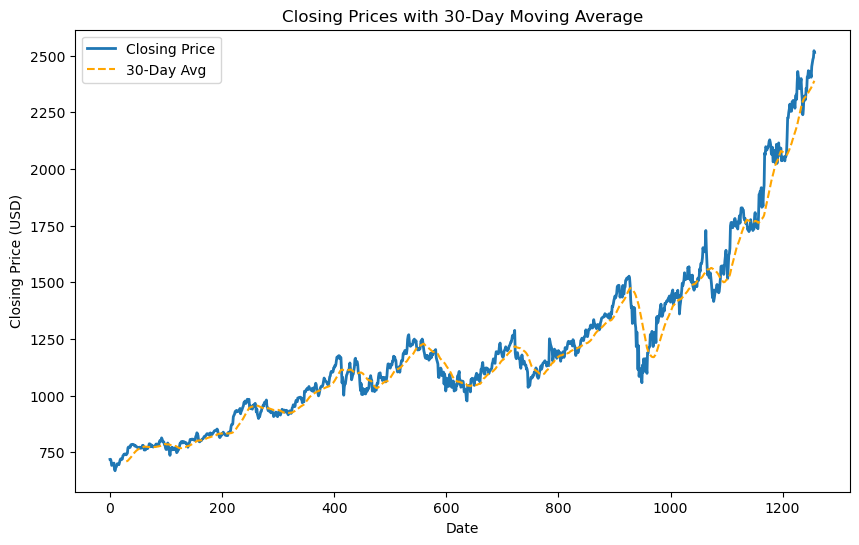

In [17]:
plt.figure(figsize=(10, 6))
df1['close'].plot(label='Closing Price', linewidth=2)
df1['close'].rolling(window=30).mean().plot(label='30-Day Avg', linestyle='--', color='orange')
plt.title('Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

**Splitting the Dataset:**
>We’ll divide the historical stock price data into training and testing sets.
The training set will be used to train the model, and the testing set will evaluate its performance.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

relevant_columns = ['date', 'close', 'open', 'volume']
df_relevant = df1[relevant_columns]

# Split the data (80% training, 20% testing)
train_size = 0.8
train_data, test_data = train_test_split(df_relevant, train_size=train_size, shuffle=False)

# Verify the split
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")


Training data size: 1006
Testing data size: 252


### Model Building :
**Linear Regression Model:**
>We’ll build a linear regression model using relevant features (closing price, moving averages, etc.).
Linear regression assumes a linear relationship between features and the target variable (closing price).

In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Split Data into Training and Testing Sets:**

In [20]:
X = df1[['open', 'volume']]  # Features (independent variables)
y = df1['close']  # Target variable (closing price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Creating and Train the Linear Regression Model:**

In [21]:
model=LinearRegression()
# Trainig the model using training data:
model.fit(X_train,y_train)

LinearRegression()

**Predictions:**

In [22]:
#Used the trained model to make predictions on the testing data:
y_pred=model.predict(X_test)
y_pred

array([1193.07972447,  749.49348472,  769.41457071,  765.50860061,
       1495.97277154, 1091.80675712, 1183.85887684, 1500.86782982,
       1753.18545791, 1525.69305349, 1192.59898573, 1517.19436968,
        820.80054216, 1211.40370555, 1671.97242213, 1032.59200787,
       1484.53323166, 1104.63582294, 1095.74319162, 1309.21709979,
       1327.81577477, 1022.53043845,  875.92627687, 1108.81239632,
       1581.34090291, 1160.88071841, 1094.94524068,  957.96100242,
       1119.67457619,  786.13979013, 1511.57583233,  952.71702318,
       1765.70702849, 1437.55501885, 1114.54838177, 1050.19559847,
        943.6743598 ,  927.60376352, 1078.77078034,  819.40424043,
       2305.6067608 , 1068.80451896, 1087.01339984,  760.94453518,
       1232.89681892, 1450.94998353,  931.5463589 ,  724.01152469,
       1082.04924265, 1254.62979155, 1046.0795762 ,  936.60481995,
       1231.60383288, 1343.71504187,  934.04127865,  969.64159594,
        826.70229687,  830.92787327, 2076.22617778, 1039.00608

**Model Evaluation:**
>Evaluating the model’s performance (Mean Absolute Error, Root Mean Squared Error)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 10.59, RMSE: 15.75


**Mean Absolute Error (MAE):** 
* In this model, the MAE is approximately 10.59.Lower MAE values indicate better accuracy.

**Root Mean Squared Error (RMSE):**
* In this model, the RMSE is approximately 15.75.Smaller RMSE values also indicate better accuracy.

**Visualizing Predictions:**
* Plot actual vs. predicted closing prices:

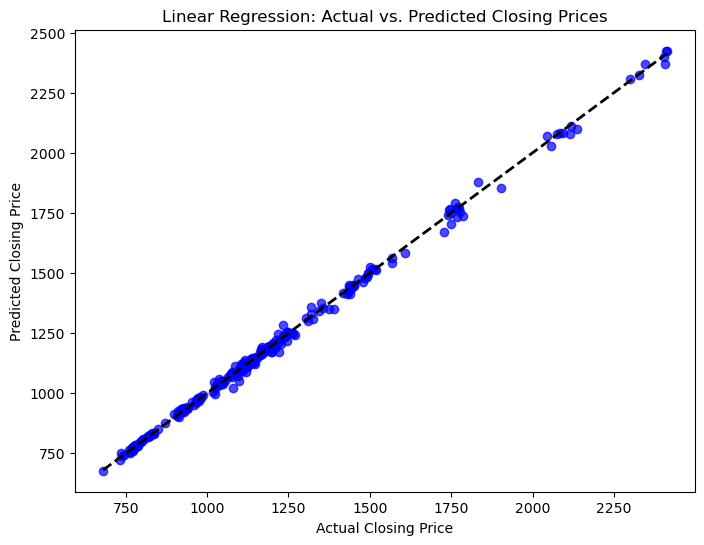

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Linear Regression: Actual vs. Predicted Closing Prices")
plt.show()

> The scatterplot shows the actual vs. predicted closing prices from a linear regression model. The closeness of the data points to the dashed line, which represents the ideal prediction, indicates that the model has a strong predictive performance. Most points are near or on the line, suggesting high accuracy in the model’s predictions for this dataset. 

**Stock Price Prediction Success:**

* **Model Performance:** The linear regression model showed good accuracy in predicting Google’s stock prices, with a Mean Absolute Error (MAE) of 10.59 and a Root Mean Squared Error (RMSE) of 15.751.
* **Visualization Insight:** Plots like the actual vs. predicted closing prices confirmed the model’s reliable performance.
* **Future Predictions:** While the model is effective, it’s important to remember that stock market predictions are inherently uncertain and should be used with caution.

### Conclusion :
>This project demonstrates that machine learning, specifically linear regression, can be a valuable tool in forecasting stock prices, offering insights into potential future trends.